**Input:** 
- UK Biobank cancer-related fields
- ACCEL dataset (Katori et al. 2022)


**Process:**
 - Extract the subset population with ACCEL dataset available
 - See whether cancer makes any difference in ACCEL features

**Output:**


# Preparation (Execute all in this section!)

## Import libraries & set environment variables

In [1]:
import collections
from datetime import datetime
import os
import numpy as np
from pathlib import Path
import polars as pl
import re
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt

import warnings
# suppress DeprecationWarning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

dir_home = Path(os.getcwd()).parent.parent.parent
os.chdir(dir_home)
print("Current directory (check that it's your home directory):", os.getcwd())

Current directory (check that it's your home directory): J:\sugai\UKBiobank


In [2]:
DIR_SOURCE = os.path.join("data", "accel_ukbb", "split")
DIR_OUT = os.path.join("analysis", "specific", "analysis_20230417_01_ACCEL_cancer")

if not os.path.exists(DIR_OUT):
    os.makedirs(DIR_OUT)

## Functions

In [3]:
def merge_files(list_files, dir):
    list_files = [os.path.join(dir, file) for file in list_files]

    # Initialize an empty DataFrame
    df_merged = pl.DataFrame()
    
    print(datetime.now(), "Start processing", len(list_files), "files")

    # Loop over each file in the list and add it to the merged DataFrame
    for i, file in enumerate(list_files):
        func_print(i + 1)
        # Read in the current file as a DataFrame
        df_current = pl.read_csv(file, sep="\t")

        # Get the column name for the current file's specific column
        column_name = os.path.splitext(os.path.basename(file))[0]

        # Rename the specific column to the name of the current file
        #df_current = df_current.rename(columns={df_current.columns[1]: column_name})
        df_current = df_current.rename({df_current.columns[1]: column_name})

        # If this is the first file being added, simply set df_merged to df_current
        if df_merged.shape == (0, 0):
            df_merged = df_current

        # Otherwise, merge df_current with df_merged on the "eid" column
        else:
            df_merged = df_merged.join(df_current, on="eid", how="outer")

    return df_merged
    
    

def func_print(i):
    if i < 10 or str(i)[1:].count('0') == len(str(i))-1:
        now = datetime.now()
        print(f"{now.strftime('%Y-%m-%d %H:%M:%S')}: {i}")


# Merge the relevant fields

In [4]:
list_files = ["ukb671006_00122_84-0.0.txt",
"ukb671006_00123_84-0.1.txt",
"ukb671006_00124_84-0.2.txt",
"ukb671006_00125_84-0.3.txt",
"ukb671006_00126_84-0.4.txt",
"ukb671006_00127_84-0.5.txt",
"ukb671006_00128_84-1.0.txt",
"ukb671006_00129_84-1.1.txt",
"ukb671006_00130_84-1.2.txt",
"ukb671006_00131_84-1.3.txt",
"ukb671006_00132_84-1.4.txt",
"ukb671006_00133_84-1.5.txt",
"ukb671006_00134_84-2.0.txt",
"ukb671006_00135_84-2.1.txt",
"ukb671006_00136_84-2.2.txt",
"ukb671006_00137_84-2.3.txt",
"ukb671006_00138_84-2.4.txt",
"ukb671006_00139_84-2.5.txt",
"ukb671006_00140_84-3.0.txt",
"ukb671006_00141_84-3.1.txt",
"ukb671006_00142_84-3.2.txt",
"ukb671006_00143_84-3.3.txt",
"ukb671006_00144_84-3.4.txt",
"ukb671006_00145_84-3.5.txt",
"ukb671006_09150_20006-0.0.txt",
"ukb671006_09151_20006-0.1.txt",
"ukb671006_09152_20006-0.2.txt",
"ukb671006_09153_20006-0.3.txt",
"ukb671006_09154_20006-0.4.txt",
"ukb671006_09155_20006-0.5.txt",
"ukb671006_09156_20006-1.0.txt",
"ukb671006_09157_20006-1.1.txt",
"ukb671006_09158_20006-1.2.txt",
"ukb671006_09159_20006-1.3.txt",
"ukb671006_09160_20006-1.4.txt",
"ukb671006_09161_20006-1.5.txt",
"ukb671006_09162_20006-2.0.txt",
"ukb671006_09163_20006-2.1.txt",
"ukb671006_09164_20006-2.2.txt",
"ukb671006_09165_20006-2.3.txt",
"ukb671006_09166_20006-2.4.txt",
"ukb671006_09167_20006-2.5.txt",
"ukb671006_09168_20006-3.0.txt",
"ukb671006_09169_20006-3.1.txt",
"ukb671006_09170_20006-3.2.txt",
"ukb671006_09171_20006-3.3.txt",
"ukb671006_09172_20006-3.4.txt",
"ukb671006_09173_20006-3.5.txt",
"ukb671006_22286_40005-0.0.txt",
"ukb671006_22287_40005-1.0.txt",
"ukb671006_22288_40005-2.0.txt",
"ukb671006_22289_40005-3.0.txt",
"ukb671006_22290_40005-4.0.txt",
"ukb671006_22291_40005-5.0.txt",
"ukb671006_22292_40005-6.0.txt",
"ukb671006_22293_40005-7.0.txt",
"ukb671006_22294_40005-8.0.txt",
"ukb671006_22295_40005-9.0.txt",
"ukb671006_22296_40005-10.0.txt",
"ukb671006_22297_40005-11.0.txt",
"ukb671006_22298_40005-12.0.txt",
"ukb671006_22299_40005-13.0.txt",
"ukb671006_22300_40005-14.0.txt",
"ukb671006_22301_40005-15.0.txt",
"ukb671006_22302_40005-16.0.txt",
"ukb671006_22303_40005-17.0.txt",
"ukb671006_22304_40005-18.0.txt",
"ukb671006_22305_40005-19.0.txt",
"ukb671006_22306_40005-20.0.txt",
"ukb671006_22307_40005-21.0.txt",
"ukb671006_22332_40008-0.0.txt",
"ukb671006_22333_40008-1.0.txt",
"ukb671006_22334_40008-2.0.txt",
"ukb671006_22335_40008-3.0.txt",
"ukb671006_22336_40008-4.0.txt",
"ukb671006_22337_40008-5.0.txt",
"ukb671006_22338_40008-6.0.txt",
"ukb671006_22339_40008-7.0.txt",
"ukb671006_22340_40008-8.0.txt",
"ukb671006_22341_40008-9.0.txt",
"ukb671006_22342_40008-10.0.txt",
"ukb671006_22343_40008-11.0.txt",
"ukb671006_22344_40008-12.0.txt",
"ukb671006_22345_40008-13.0.txt",
"ukb671006_22346_40008-14.0.txt",
"ukb671006_22347_40008-15.0.txt",
"ukb671006_22348_40008-16.0.txt",
"ukb671006_22349_40008-17.0.txt",
"ukb671006_22350_40008-18.0.txt",
"ukb671006_22351_40008-19.0.txt",
"ukb671006_22352_40008-20.0.txt",
"ukb671006_22353_40008-21.0.txt",
"ukb671006_24430_90010-0.0.txt",
"ukb671006_28448_eid_old.txt",
"ukb671006_28449_day_num.txt",
"ukb671006_28450_ST_long_mean.txt",
"ukb671006_28451_ST_long_sd.txt",
"ukb671006_28452_WT_long_mean.txt",
"ukb671006_28453_WT_long_sd.txt",
"ukb671006_28454_ST_short_mean.txt",
"ukb671006_28455_ST_short_sd.txt",
"ukb671006_28456_WT_short_mean.txt",
"ukb671006_28457_WT_short_sd.txt",
"ukb671006_28458_long_window_len_mean.txt",
"ukb671006_28459_long_window_len_sd.txt",
"ukb671006_28460_long_window_num_mean.txt",
"ukb671006_28461_long_window_num_sd.txt",
"ukb671006_28462_short_window_len_mean.txt",
"ukb671006_28463_short_window_len_sd.txt",
"ukb671006_28464_short_window_num_mean.txt",
"ukb671006_28465_short_window_num_sd.txt",
"ukb671006_28466_phase_mean.txt",
"ukb671006_28467_phase_sd.txt",
"ukb671006_28468_max_period.txt",
"ukb671006_28469_amplitude.txt",
"ukb671006_28470_sleep_percentage.txt",
"ukb671006_28471_continuous_day.txt",
"ukb671006_28472_age.txt",
"ukb671006_28473_sex.txt",
"ukb671006_28474_cluster.txt",
"ukb671006_28475_group_eid_old.txt",
"ukb671006_28476_abnormal_group_eid_old.txt",
"ukb671006_28477_axivity_age.txt",
"ukb671006_28478_axivity_month.txt",
"ukb671006_28479_cluster_alphabet.txt",
"ukb671006_28480_group_five.txt",
"ukb671006_28481_group_eight.txt",
"ukb671006_28482_abnormal_group_eight.txt",]
df = merge_files(list_files, DIR_SOURCE)

2023-04-18 14:07:21.183284 Start processing 128 files
2023-04-18 14:07:21: 1
2023-04-18 14:07:22: 2
2023-04-18 14:07:26: 3
2023-04-18 14:07:30: 4
2023-04-18 14:07:34: 5
2023-04-18 14:07:38: 6
2023-04-18 14:07:42: 7
2023-04-18 14:07:47: 8
2023-04-18 14:07:56: 9
2023-04-18 14:08:01: 10
2023-04-18 14:08:37: 20
2023-04-18 14:09:14: 30
2023-04-18 14:09:50: 40
2023-04-18 14:10:31: 50
2023-04-18 14:11:08: 60
2023-04-18 14:11:45: 70
2023-04-18 14:12:23: 80
2023-04-18 14:13:13: 90
2023-04-18 14:14:00: 100


In [5]:
df

shape: (502386, 129)
┌─────────┬────────────┬──────────────┬──────────────┬─────┬──────────────┬──────────────┬──────────────┬──────────────┐
│ eid     ┆ ukb671006_ ┆ ukb671006_00 ┆ ukb671006_00 ┆ ... ┆ ukb671006_28 ┆ ukb671006_28 ┆ ukb671006_28 ┆ ukb671006_28 │
│ ---     ┆ 00122_84-0 ┆ 123_84-0.1   ┆ 124_84-0.2   ┆     ┆ 479_cluster_ ┆ 480_group_fi ┆ 481_group_ei ┆ 482_abnormal │
│ i64     ┆ .0         ┆ ---          ┆ ---          ┆     ┆ alphabet     ┆ ve           ┆ ght          ┆ _group_e...  │
│         ┆ ---        ┆ str          ┆ str          ┆     ┆ ---          ┆ ---          ┆ ---          ┆ ---          │
│         ┆ str        ┆              ┆              ┆     ┆ str          ┆ str          ┆ str          ┆ str          │
╞═════════╪════════════╪══════════════╪══════════════╪═════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ 1000010 ┆ NA         ┆ NA           ┆ NA           ┆ ... ┆ NA           ┆ NA           ┆ NA           ┆ NA           │
│ 1000028 ┆ 2008       ┆ NA           ┆ NA           ┆ ... ┆ NA           ┆ NA           ┆ NA           ┆ NA           │
│ 1000034 ┆ NA         ┆ NA           ┆ NA           ┆ ... ┆ NA           ┆ NA           ┆ NA           ┆ NA           │
│ 1000045 ┆ NA         ┆ NA           ┆ NA           ┆ ... ┆ NA           ┆ NA           ┆ NA           ┆ NA           │
│ ...     ┆ ...        ┆ ...          ┆ ...          ┆ ... ┆ ...          ┆ ...          ┆ ...          ┆ ...          │
│ 6024804 ┆ NA         ┆ NA           ┆ NA           ┆ ... ┆ NA           ┆ NA           ┆ NA           ┆ NA           │
│ 6024818 ┆ NA         ┆ NA           ┆ NA           ┆ ... ┆ A            ┆ 1            ┆ A            ┆ NA           │
│ 6024820 ┆ NA         ┆ NA           ┆ NA           ┆ ... ┆ NA           ┆ NA           ┆ NA           ┆ NA           │
│ 6024833 ┆ NA         ┆ NA           ┆ NA           ┆ ... ┆ NA           ┆ NA           ┆ NA           ┆ NA           │
└─────────┴────────────┴──────────────┴──────────────┴─────┴──────────────┴──────────────┴──────────────┴──────────────┘

limit_output extension: Maximum message size of 5000 exceeded with 52655 characters

In [ ]:
FILE_OUT = os.path.join(DIR_OUT, "joined.csv")
df.write_csv(FILE_OUT)

# Extract the subset population with ACCEL dataset available

In [6]:
cols_cancer_date = ["ukb671006_00122_84-0.0", 
"ukb671006_00123_84-0.1", 
"ukb671006_00124_84-0.2", 
"ukb671006_00125_84-0.3", 
"ukb671006_00126_84-0.4", 
"ukb671006_00127_84-0.5", 
"ukb671006_00128_84-1.0", 
"ukb671006_00129_84-1.1", 
"ukb671006_00130_84-1.2", 
"ukb671006_00131_84-1.3", 
"ukb671006_00132_84-1.4", 
"ukb671006_00133_84-1.5", 
"ukb671006_00134_84-2.0", 
"ukb671006_00135_84-2.1", 
"ukb671006_00136_84-2.2", 
"ukb671006_00137_84-2.3", 
"ukb671006_00138_84-2.4", 
"ukb671006_00139_84-2.5", 
"ukb671006_00140_84-3.0", 
"ukb671006_00141_84-3.1", 
"ukb671006_00142_84-3.2", 
"ukb671006_00143_84-3.3", 
"ukb671006_00144_84-3.4", 
"ukb671006_00145_84-3.5", 
"ukb671006_09150_20006-0.0", 
"ukb671006_09151_20006-0.1", 
"ukb671006_09152_20006-0.2", 
"ukb671006_09153_20006-0.3", 
"ukb671006_09154_20006-0.4", 
"ukb671006_09155_20006-0.5", 
"ukb671006_09156_20006-1.0", 
"ukb671006_09157_20006-1.1", 
"ukb671006_09158_20006-1.2", 
"ukb671006_09159_20006-1.3", 
"ukb671006_09160_20006-1.4", 
"ukb671006_09161_20006-1.5", 
"ukb671006_09162_20006-2.0", 
"ukb671006_09163_20006-2.1", 
"ukb671006_09164_20006-2.2", 
"ukb671006_09165_20006-2.3", 
"ukb671006_09166_20006-2.4", 
"ukb671006_09167_20006-2.5", 
"ukb671006_09168_20006-3.0", 
"ukb671006_09169_20006-3.1", 
"ukb671006_09170_20006-3.2", 
"ukb671006_09171_20006-3.3", 
"ukb671006_09172_20006-3.4", 
"ukb671006_09173_20006-3.5", 
"ukb671006_22286_40005-0.0", 
"ukb671006_22287_40005-1.0", 
"ukb671006_22288_40005-2.0", 
"ukb671006_22289_40005-3.0", 
"ukb671006_22290_40005-4.0", 
"ukb671006_22291_40005-5.0", 
"ukb671006_22292_40005-6.0", 
"ukb671006_22293_40005-7.0", 
"ukb671006_22294_40005-8.0", 
"ukb671006_22295_40005-9.0", 
"ukb671006_22296_40005-10.0", 
"ukb671006_22297_40005-11.0", 
"ukb671006_22298_40005-12.0", 
"ukb671006_22299_40005-13.0", 
"ukb671006_22300_40005-14.0", 
"ukb671006_22301_40005-15.0", 
"ukb671006_22302_40005-16.0", 
"ukb671006_22303_40005-17.0", 
"ukb671006_22304_40005-18.0", 
"ukb671006_22305_40005-19.0", 
"ukb671006_22306_40005-20.0", 
"ukb671006_22307_40005-21.0", 
"ukb671006_22332_40008-0.0", 
"ukb671006_22333_40008-1.0", 
"ukb671006_22334_40008-2.0", 
"ukb671006_22335_40008-3.0", 
"ukb671006_22336_40008-4.0", 
"ukb671006_22337_40008-5.0", 
"ukb671006_22338_40008-6.0", 
"ukb671006_22339_40008-7.0", 
"ukb671006_22340_40008-8.0", 
"ukb671006_22341_40008-9.0", 
"ukb671006_22342_40008-10.0", 
"ukb671006_22343_40008-11.0", 
"ukb671006_22344_40008-12.0", 
"ukb671006_22345_40008-13.0", 
"ukb671006_22346_40008-14.0", 
"ukb671006_22347_40008-15.0", 
"ukb671006_22348_40008-16.0", 
"ukb671006_22349_40008-17.0", 
"ukb671006_22350_40008-18.0", 
"ukb671006_22351_40008-19.0", 
"ukb671006_22352_40008-20.0", 
"ukb671006_22353_40008-21.0",
]

In [7]:
# Create a boolean DataFrame indicating if the values are different from "NA"
bool_df = df.select([(pl.col(col) != "NA").cast(pl.Int32) for col in cols_cancer_date])

# Sum the integer values for each row
row_counts = bool_df.sum(axis=1)

# Add row_counts as a new column in the original DataFrame
#df_with_counts = df.with_column(pl.col("row_counts").alias("counts"))
#df = df.with_column("NA_count", row_counts)
df_filtered = (df.with_column(row_counts.alias("NA_count"))
               .filter(pl.col("NA_count") > 0)
               .filter(pl.col("ukb671006_28448_eid_old") != "NA")
              )

In [ ]:
FILE_OUT = os.path.join(DIR_OUT, "filtered.csv")
df_filtered.write_csv(FILE_OUT)

In [8]:
df_filtered

shape: (19003, 130)
┌─────────┬───────────────┬───────────────┬──────────────┬─────┬──────────────┬──────────────┬──────────────┬──────────┐
│ eid     ┆ ukb671006_001 ┆ ukb671006_001 ┆ ukb671006_00 ┆ ... ┆ ukb671006_28 ┆ ukb671006_28 ┆ ukb671006_28 ┆ NA_count │
│ ---     ┆ 22_84-0.0     ┆ 23_84-0.1     ┆ 124_84-0.2   ┆     ┆ 480_group_fi ┆ 481_group_ei ┆ 482_abnormal ┆ ---      │
│ i64     ┆ ---           ┆ ---           ┆ ---          ┆     ┆ ve           ┆ ght          ┆ _group_e...  ┆ i32      │
│         ┆ str           ┆ str           ┆ str          ┆     ┆ ---          ┆ ---          ┆ ---          ┆          │
│         ┆               ┆               ┆              ┆     ┆ str          ┆ str          ┆ str          ┆          │
╞═════════╪═══════════════╪═══════════════╪══════════════╪═════╪══════════════╪══════════════╪══════════════╪══════════╡
│ 1000337 ┆ NA            ┆ NA            ┆ NA           ┆ ... ┆ 4            ┆ G            ┆ NA           ┆ 2        │
│ 1001184 ┆ NA            ┆ NA            ┆ NA           ┆ ... ┆ 4            ┆ G            ┆ NA           ┆ 4        │
│ 1001439 ┆ 2000          ┆ NA            ┆ NA           ┆ ... ┆ 1            ┆ A            ┆ NA           ┆ 4        │
│ 1001725 ┆ NA            ┆ NA            ┆ NA           ┆ ... ┆ 4            ┆ G            ┆ NA           ┆ 2        │
│ ...     ┆ ...           ┆ ...           ┆ ...          ┆ ... ┆ ...          ┆ ...          ┆ ...          ┆ ...      │
│ 6022983 ┆ NA            ┆ NA            ┆ NA           ┆ ... ┆ 4            ┆ G            ┆ NA           ┆ 4        │
│ 6023069 ┆ NA            ┆ NA            ┆ NA           ┆ ... ┆ 4            ┆ G            ┆ NA           ┆ 2        │
│ 6023283 ┆ NA            ┆ NA            ┆ NA           ┆ ... ┆ 4            ┆ G            ┆ NA           ┆ 2        │
│ 6023473 ┆ NA            ┆ NA            ┆ NA           ┆ ... ┆ 4            ┆ G            ┆ NA           ┆ 2        │
└─────────┴───────────────┴───────────────┴──────────────┴─────┴──────────────┴──────────────┴──────────────┴──────────┘

limit_output extension: Maximum message size of 5000 exceeded with 55509 characters

# Count the number of filled fields per column

- Cancer
  - Age: 40008
  - Year: 20006, 40005
  - Age and Year mixed: 84
- ACCEL
  - Age: "28477", "28478"
  - Year: "90010"
  
->
- Conclusion:
  - These two have exactly the same number of available individuals
      - Age (40008) x Age ("28477", "28478")
      - Year (40005) x Year ("90010")
  - Of them, "Year (40005) x Year ("90010")" is more precise (to YYYY/MM/DD)
      - (while "Age (40008) x Age ("28477", "28478")" only provides up to YYYY/MM)

In [9]:
column_names = df_filtered.columns
column_names.remove("eid")
column_names.remove("NA_count")

# Count the number of rows not containing the value `string1` for each column
counts = [df_filtered.filter(pl.col(col) != "NA").shape[0] for col in column_names]

# Combine the column names and their counts into a dictionary
column_counts = list(zip(column_names, counts))

for l in column_counts:
    print(l)

('ukb671006_00122_84-0.0', 6508)
('ukb671006_00123_84-0.1', 366)
('ukb671006_00124_84-0.2', 31)
('ukb671006_00125_84-0.3', 1)
('ukb671006_00126_84-0.4', 0)
('ukb671006_00127_84-0.5', 0)
('ukb671006_00128_84-1.0', 802)
('ukb671006_00129_84-1.1', 40)
('ukb671006_00130_84-1.2', 4)
('ukb671006_00131_84-1.3', 0)
('ukb671006_00132_84-1.4', 0)
('ukb671006_00133_84-1.5', 0)
('ukb671006_00134_84-2.0', 1594)
('ukb671006_00135_84-2.1', 102)
('ukb671006_00136_84-2.2', 7)
('ukb671006_00137_84-2.3', 1)
('ukb671006_00138_84-2.4', 1)
('ukb671006_00139_84-2.5', 0)
('ukb671006_00140_84-3.0', 206)
('ukb671006_00141_84-3.1', 10)
('ukb671006_00142_84-3.2', 2)
('ukb671006_00143_84-3.3', 0)
('ukb671006_00144_84-3.4', 0)
('ukb671006_00145_84-3.5', 0)
('ukb671006_09150_20006-0.0', 6508)
('ukb671006_09151_20006-0.1', 366)
('ukb671006_09152_20006-0.2', 31)
('ukb671006_09153_20006-0.3', 1)
('ukb671006_09154_20006-0.4', 0)
('ukb671006_09155_20006-0.5', 0)
('ukb671006_09156_20006-1.0', 802)
('ukb671006_09157_20006-

In [10]:
# Count the total available fields for age
cols_age = [
"ukb671006_22332_40008-0.0", 
"ukb671006_22333_40008-1.0", 
"ukb671006_22334_40008-2.0", 
"ukb671006_22335_40008-3.0", 
"ukb671006_22336_40008-4.0", 
"ukb671006_22337_40008-5.0", 
"ukb671006_22338_40008-6.0", 
"ukb671006_22339_40008-7.0", 
"ukb671006_22340_40008-8.0", 
"ukb671006_22341_40008-9.0", 
"ukb671006_22342_40008-10.0", 
"ukb671006_22343_40008-11.0", 
"ukb671006_22344_40008-12.0", 
"ukb671006_22345_40008-13.0", 
"ukb671006_22346_40008-14.0", 
"ukb671006_22347_40008-15.0", 
"ukb671006_22348_40008-16.0", 
"ukb671006_22349_40008-17.0", 
"ukb671006_22350_40008-18.0", 
"ukb671006_22351_40008-19.0", 
"ukb671006_22352_40008-20.0", 
"ukb671006_22353_40008-21.0",]

bool_df = df_filtered.select([(pl.col(col) != "NA").cast(pl.Int32) for col in cols_age])
row_counts = bool_df.sum(axis=1)

df_count = (pl.DataFrame()
           .with_column(row_counts.alias("NA_count"))
            .filter(pl.col("NA_count") > 0)
           )
print(df_count.shape[0], "rows contains age-related data")

17782 rows contains age-related data


In [11]:
# Count the total available fields for year
cols_year = [
"ukb671006_22286_40005-0.0", 
"ukb671006_22287_40005-1.0", 
"ukb671006_22288_40005-2.0", 
"ukb671006_22289_40005-3.0", 
"ukb671006_22290_40005-4.0", 
"ukb671006_22291_40005-5.0", 
"ukb671006_22292_40005-6.0", 
"ukb671006_22293_40005-7.0", 
"ukb671006_22294_40005-8.0", 
"ukb671006_22295_40005-9.0", 
"ukb671006_22296_40005-10.0", 
"ukb671006_22297_40005-11.0", 
"ukb671006_22298_40005-12.0", 
"ukb671006_22299_40005-13.0", 
"ukb671006_22300_40005-14.0", 
"ukb671006_22301_40005-15.0", 
"ukb671006_22302_40005-16.0", 
"ukb671006_22303_40005-17.0", 
"ukb671006_22304_40005-18.0", 
"ukb671006_22305_40005-19.0", 
"ukb671006_22306_40005-20.0", 
"ukb671006_22307_40005-21.0", ]

bool_df = df_filtered.select([(pl.col(col) != "NA").cast(pl.Int32) for col in cols_year])
row_counts = bool_df.sum(axis=1)

df_count = (pl.DataFrame()
           .with_column(row_counts.alias("NA_count"))
            .filter(pl.col("NA_count") > 0)
           )
print(df_count.shape[0], "rows contains year-related data")

17782 rows contains year-related data


# Take out the relevant part & Calculate the earliest date of cancer diagnosis

In [12]:
cols = ['eid',
# 'ukb671006_00122_84-0.0',
# 'ukb671006_00123_84-0.1',
# 'ukb671006_00124_84-0.2',
#  'ukb671006_00125_84-0.3',
#  'ukb671006_00126_84-0.4',
#  'ukb671006_00127_84-0.5',
#  'ukb671006_00128_84-1.0',
#  'ukb671006_00129_84-1.1',
#  'ukb671006_00130_84-1.2',
#  'ukb671006_00131_84-1.3',
#  'ukb671006_00132_84-1.4',
#  'ukb671006_00133_84-1.5',
#  'ukb671006_00134_84-2.0',
#  'ukb671006_00135_84-2.1',
#  'ukb671006_00136_84-2.2',
#  'ukb671006_00137_84-2.3',
#  'ukb671006_00138_84-2.4',
#  'ukb671006_00139_84-2.5',
#  'ukb671006_00140_84-3.0',
#  'ukb671006_00141_84-3.1',
#  'ukb671006_00142_84-3.2',
#  'ukb671006_00143_84-3.3',
#  'ukb671006_00144_84-3.4',
#  'ukb671006_00145_84-3.5',
#  'ukb671006_09150_20006-0.0',
#  'ukb671006_09151_20006-0.1',
#  'ukb671006_09152_20006-0.2',
#  'ukb671006_09153_20006-0.3',
#  'ukb671006_09154_20006-0.4',
#  'ukb671006_09155_20006-0.5',
#  'ukb671006_09156_20006-1.0',
#  'ukb671006_09157_20006-1.1',
#  'ukb671006_09158_20006-1.2',
#  'ukb671006_09159_20006-1.3',
#  'ukb671006_09160_20006-1.4',
#  'ukb671006_09161_20006-1.5',
#  'ukb671006_09162_20006-2.0',
#  'ukb671006_09163_20006-2.1',
#  'ukb671006_09164_20006-2.2',
#  'ukb671006_09165_20006-2.3',
#  'ukb671006_09166_20006-2.4',
#  'ukb671006_09167_20006-2.5',
#  'ukb671006_09168_20006-3.0',
#  'ukb671006_09169_20006-3.1',
#  'ukb671006_09170_20006-3.2',
#  'ukb671006_09171_20006-3.3',
#  'ukb671006_09172_20006-3.4',
#  'ukb671006_09173_20006-3.5',
 'ukb671006_22286_40005-0.0',
 'ukb671006_22287_40005-1.0',
 'ukb671006_22288_40005-2.0',
 'ukb671006_22289_40005-3.0',
 'ukb671006_22290_40005-4.0',
 'ukb671006_22291_40005-5.0',
 'ukb671006_22292_40005-6.0',
 'ukb671006_22293_40005-7.0',
 'ukb671006_22294_40005-8.0',
 'ukb671006_22295_40005-9.0',
 'ukb671006_22296_40005-10.0',
 'ukb671006_22297_40005-11.0',
 'ukb671006_22298_40005-12.0',
 'ukb671006_22299_40005-13.0',
 'ukb671006_22300_40005-14.0',
 'ukb671006_22301_40005-15.0',
 'ukb671006_22302_40005-16.0',
 'ukb671006_22303_40005-17.0',
 'ukb671006_22304_40005-18.0',
 'ukb671006_22305_40005-19.0',
 'ukb671006_22306_40005-20.0',
 'ukb671006_22307_40005-21.0',
#  'ukb671006_22332_40008-0.0',
#  'ukb671006_22333_40008-1.0',
#  'ukb671006_22334_40008-2.0',
#  'ukb671006_22335_40008-3.0',
#  'ukb671006_22336_40008-4.0',
#  'ukb671006_22337_40008-5.0',
#  'ukb671006_22338_40008-6.0',
#  'ukb671006_22339_40008-7.0',
#  'ukb671006_22340_40008-8.0',
#  'ukb671006_22341_40008-9.0',
#  'ukb671006_22342_40008-10.0',
#  'ukb671006_22343_40008-11.0',
#  'ukb671006_22344_40008-12.0',
#  'ukb671006_22345_40008-13.0',
#  'ukb671006_22346_40008-14.0',
#  'ukb671006_22347_40008-15.0',
#  'ukb671006_22348_40008-16.0',
#  'ukb671006_22349_40008-17.0',
#  'ukb671006_22350_40008-18.0',
#  'ukb671006_22351_40008-19.0',
#  'ukb671006_22352_40008-20.0',
#  'ukb671006_22353_40008-21.0',
 'ukb671006_24430_90010-0.0',
 'ukb671006_28448_eid_old',
 'ukb671006_28449_day_num',
 'ukb671006_28450_ST_long_mean',
 'ukb671006_28451_ST_long_sd',
 'ukb671006_28452_WT_long_mean',
 'ukb671006_28453_WT_long_sd',
 'ukb671006_28454_ST_short_mean',
 'ukb671006_28455_ST_short_sd',
 'ukb671006_28456_WT_short_mean',
 'ukb671006_28457_WT_short_sd',
 'ukb671006_28458_long_window_len_mean',
 'ukb671006_28459_long_window_len_sd',
 'ukb671006_28460_long_window_num_mean',
 'ukb671006_28461_long_window_num_sd',
 'ukb671006_28462_short_window_len_mean',
 'ukb671006_28463_short_window_len_sd',
 'ukb671006_28464_short_window_num_mean',
 'ukb671006_28465_short_window_num_sd',
 'ukb671006_28466_phase_mean',
 'ukb671006_28467_phase_sd',
 'ukb671006_28468_max_period',
 'ukb671006_28469_amplitude',
 'ukb671006_28470_sleep_percentage',
 'ukb671006_28471_continuous_day',
 'ukb671006_28472_age',
 'ukb671006_28473_sex',
 'ukb671006_28474_cluster',
 'ukb671006_28475_group_eid_old',
 'ukb671006_28476_abnormal_group_eid_old',
#  'ukb671006_28477_axivity_age',
#  'ukb671006_28478_axivity_month',
 'ukb671006_28479_cluster_alphabet',
 'ukb671006_28480_group_five',
 'ukb671006_28481_group_eight',
 'ukb671006_28482_abnormal_group_eight',
#  'NA_count',
       ]

# Extract the rows with year info available
cols_year = [
"ukb671006_22286_40005-0.0", 
"ukb671006_22287_40005-1.0", 
"ukb671006_22288_40005-2.0", 
"ukb671006_22289_40005-3.0", 
"ukb671006_22290_40005-4.0", 
"ukb671006_22291_40005-5.0", 
"ukb671006_22292_40005-6.0", 
"ukb671006_22293_40005-7.0", 
"ukb671006_22294_40005-8.0", 
"ukb671006_22295_40005-9.0", 
"ukb671006_22296_40005-10.0", 
"ukb671006_22297_40005-11.0", 
"ukb671006_22298_40005-12.0", 
"ukb671006_22299_40005-13.0", 
"ukb671006_22300_40005-14.0", 
"ukb671006_22301_40005-15.0", 
"ukb671006_22302_40005-16.0", 
"ukb671006_22303_40005-17.0", 
"ukb671006_22304_40005-18.0", 
"ukb671006_22305_40005-19.0", 
"ukb671006_22306_40005-20.0", 
"ukb671006_22307_40005-21.0", ]

bool_df = df_filtered.select([(pl.col(col) != "NA").cast(pl.Int32) for col in cols_year])
row_counts = bool_df.sum(axis=1)

df_filtered_year = (df_filtered[cols]
            .with_column(row_counts.alias("NA_count"))
            .filter(pl.col("NA_count") > 0)
           )

# convert the columns to Date
for i_col in cols_year:
    df_filtered_year = df_filtered_year.with_columns(pl.col(i_col).str.strptime(pl.Date, fmt="%Y-%m-%d", strict=False))
    
# calculate the earliest date for each row
earliest_cancer = df_filtered_year[cols_year].min(axis=1)

df_filtered_year = df_filtered_year.with_column(earliest_cancer.alias("earliest_cancer"))
df_filtered_year

shape: (17782, 59)
┌─────────┬───────────────┬───────────────┬──────────────┬─────┬──────────────┬──────────────┬──────────┬──────────────┐
│ eid     ┆ ukb671006_222 ┆ ukb671006_222 ┆ ukb671006_22 ┆ ... ┆ ukb671006_28 ┆ ukb671006_28 ┆ NA_count ┆ earliest_can │
│ ---     ┆ 86_40005-0.0  ┆ 87_40005-1.0  ┆ 288_40005-2. ┆     ┆ 481_group_ei ┆ 482_abnormal ┆ ---      ┆ cer          │
│ i64     ┆ ---           ┆ ---           ┆ 0            ┆     ┆ ght          ┆ _group_e...  ┆ i32      ┆ ---          │
│         ┆ date          ┆ date          ┆ ---          ┆     ┆ ---          ┆ ---          ┆          ┆ date         │
│         ┆               ┆               ┆ date         ┆     ┆ str          ┆ str          ┆          ┆              │
╞═════════╪═══════════════╪═══════════════╪══════════════╪═════╪══════════════╪══════════════╪══════════╪══════════════╡
│ 1000337 ┆ 2016-04-04    ┆ null          ┆ null         ┆ ... ┆ G            ┆ NA           ┆ 1        ┆ 2016-04-04   │
│ 1001184 ┆ 2007-02-23    ┆ 2020-03-24    ┆ null         ┆ ... ┆ G            ┆ NA           ┆ 2        ┆ 2007-02-23   │
│ 1001439 ┆ 2001-03-30    ┆ null          ┆ null         ┆ ... ┆ A            ┆ NA           ┆ 1        ┆ 2001-03-30   │
│ 1001725 ┆ 2010-11-24    ┆ null          ┆ null         ┆ ... ┆ G            ┆ NA           ┆ 1        ┆ 2010-11-24   │
│ ...     ┆ ...           ┆ ...           ┆ ...          ┆ ... ┆ ...          ┆ ...          ┆ ...      ┆ ...          │
│ 6022983 ┆ 2017-03-16    ┆ null          ┆ null         ┆ ... ┆ G            ┆ NA           ┆ 1        ┆ 2017-03-16   │
│ 6023069 ┆ 2007-06-18    ┆ null          ┆ null         ┆ ... ┆ G            ┆ NA           ┆ 1        ┆ 2007-06-18   │
│ 6023283 ┆ 2011-08-19    ┆ null          ┆ null         ┆ ... ┆ G            ┆ NA           ┆ 1        ┆ 2011-08-19   │
│ 6023473 ┆ 2018-05-21    ┆ null          ┆ null         ┆ ... ┆ G            ┆ NA           ┆ 1        ┆ 2018-05-21   │
└─────────┴───────────────┴───────────────┴──────────────┴─────┴──────────────┴──────────────┴──────────┴──────────────┘

limit_output extension: Maximum message size of 5000 exceeded with 39524 characters

In [ ]:
FILE_OUT = os.path.join(DIR_OUT, "filtered_year.csv")
df_filtered_year.write_csv(FILE_OUT)

# Flag whether the cancer diagnosis is before or after the accelerometry measurement

In [13]:
df_annotated = df_filtered_year.drop(cols_year)
accel_after_cancer = (df_annotated['ukb671006_24430_90010-0.0'] > df_annotated['earliest_cancer']).cast(pl.Boolean)
df_annotated = df_annotated.with_column(accel_after_cancer.alias("accel_after_cancer"))
df_annotated

shape: (17782, 38)
┌─────────┬───────────────┬───────────────┬──────────────┬─────┬──────────────┬──────────┬──────────────┬──────────────┐
│ eid     ┆ ukb671006_244 ┆ ukb671006_284 ┆ ukb671006_28 ┆ ... ┆ ukb671006_28 ┆ NA_count ┆ earliest_can ┆ accel_after_ │
│ ---     ┆ 30_90010-0.0  ┆ 48_eid_old    ┆ 449_day_num  ┆     ┆ 482_abnormal ┆ ---      ┆ cer          ┆ cancer       │
│ i64     ┆ ---           ┆ ---           ┆ ---          ┆     ┆ _group_e...  ┆ i32      ┆ ---          ┆ ---          │
│         ┆ str           ┆ str           ┆ str          ┆     ┆ ---          ┆          ┆ date         ┆ bool         │
│         ┆               ┆               ┆              ┆     ┆ str          ┆          ┆              ┆              │
╞═════════╪═══════════════╪═══════════════╪══════════════╪═════╪══════════════╪══════════╪══════════════╪══════════════╡
│ 1000337 ┆ 2014-11-15T10 ┆ 5579755       ┆ 6.0          ┆ ... ┆ NA           ┆ 1        ┆ 2016-04-04   ┆ false        │
│         ┆ :00:00        ┆               ┆              ┆     ┆              ┆          ┆              ┆              │
│ 1001184 ┆ 2015-11-20T10 ┆ 4024816       ┆ 6.0          ┆ ... ┆ NA           ┆ 2        ┆ 2007-02-23   ┆ true         │
│         ┆ :00:00        ┆               ┆              ┆     ┆              ┆          ┆              ┆              │
│ 1001439 ┆ 2015-03-21T10 ┆ 1238327       ┆ 6.0          ┆ ... ┆ NA           ┆ 1        ┆ 2001-03-30   ┆ true         │
│         ┆ :00:00        ┆               ┆              ┆     ┆              ┆          ┆              ┆              │
│ 1001725 ┆ 2014-10-17T10 ┆ 2583344       ┆ 6.0          ┆ ... ┆ NA           ┆ 1        ┆ 2010-11-24   ┆ true         │
│         ┆ :00:00        ┆               ┆              ┆     ┆              ┆          ┆              ┆              │
│ ...     ┆ ...           ┆ ...           ┆ ...          ┆ ... ┆ ...          ┆ ...      ┆ ...          ┆ ...          │
│ 6022983 ┆ 2015-09-21T10 ┆ 3937382       ┆ 6.0          ┆ ... ┆ NA           ┆ 1        ┆ 2017-03-16   ┆ false        │
│         ┆ :00:00        ┆               ┆              ┆     ┆              ┆          ┆              ┆              │
│ 6023069 ┆ 2015-09-26T10 ┆ 4069378       ┆ 6.0          ┆ ... ┆ NA           ┆ 1        ┆ 2007-06-18   ┆ true         │
│         ┆ :00:00        ┆               ┆              ┆     ┆              ┆          ┆              ┆              │
│ 6023283 ┆ 2014-04-16T10 ┆ 5906221       ┆ 6.0          ┆ ... ┆ NA           ┆ 1        ┆ 2011-08-19   ┆ true         │
│         ┆ :00:00        ┆               ┆              ┆     ┆              ┆          ┆              ┆              │
│ 6023473 ┆ 2015-05-15T10 ┆ 4653033       ┆ 6.0          ┆ ... ┆ NA           ┆ 1        ┆ 2018-05-21   ┆ false        │
│         ┆ :00:00        ┆               ┆              ┆     ┆              ┆          ┆              ┆              │
└─────────┴───────────────┴───────────────┴──────────────┴─────┴──────────────┴──────────┴──────────────┴──────────────┘

limit_output extension: Maximum message size of 5000 exceeded with 29852 characters

In [5]:
FILE_OUT = os.path.join(DIR_OUT, "filtered_annotated.csv")
df_annotated.write_csv(FILE_OUT)

TypeError: join() got an unexpected keyword argument 'infer_schema'

# Comparison of "accelerometry before/after cancer"

It would also be possible to compare between "with/without cancer diagnosis".

In [8]:
file = os.path.join(DIR_OUT, "filtered_annotated.csv")
df_annotated = pl.read_csv(file, infer_schema_length=None)
df_annotated

eid,ukb671006_24430_90010-0.0,ukb671006_28448_eid_old,ukb671006_28449_day_num,ukb671006_28450_ST_long_mean,ukb671006_28451_ST_long_sd,ukb671006_28452_WT_long_mean,ukb671006_28453_WT_long_sd,ukb671006_28454_ST_short_mean,ukb671006_28455_ST_short_sd,ukb671006_28456_WT_short_mean,ukb671006_28457_WT_short_sd,ukb671006_28458_long_window_len_mean,ukb671006_28459_long_window_len_sd,ukb671006_28460_long_window_num_mean,ukb671006_28461_long_window_num_sd,ukb671006_28462_short_window_len_mean,ukb671006_28463_short_window_len_sd,ukb671006_28464_short_window_num_mean,ukb671006_28465_short_window_num_sd,ukb671006_28466_phase_mean,ukb671006_28467_phase_sd,ukb671006_28468_max_period,ukb671006_28469_amplitude,ukb671006_28470_sleep_percentage,ukb671006_28471_continuous_day,ukb671006_28472_age,ukb671006_28473_sex,ukb671006_28474_cluster,ukb671006_28475_group_eid_old,ukb671006_28476_abnormal_group_eid_old,ukb671006_28479_cluster_alphabet,ukb671006_28480_group_five,ukb671006_28481_group_eight,ukb671006_28482_abnormal_group_eight,NA_count,earliest_cancer,accel_after_cancer
i64,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,str,str,str,str,str,str,i64,str,bool
1000337,"""2014-11-15T10:...",5579755,6.0,399.166667,56.688966,71.0,19.459359,28.0,57.202127,3.0,6.708204,470.166667,73.326704,1.0,0.0,93.0,80.5,0.333333,0.471405,848.833333,26.497903,1440.0,0.599609,0.297569,6.0,56,1,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",1,"""2016-04-04""",false
1001184,"""2015-11-20T10:...",4024816,6.0,460.083333,47.69383,55.25,24.716307,58.083333,60.990038,44.0,55.780821,515.333333,68.994968,1.0,0.0,61.25,63.977828,1.666667,0.745356,851.333333,13.816255,1440.0,0.711019,0.367824,6.0,68,1,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",2,"""2007-02-23""",true
1001439,"""2015-03-21T10:...",1238327,6.0,378.833333,122.758797,80.583333,58.686609,183.75,47.682762,97.75,70.364971,393.785714,155.802498,1.166667,0.372678,93.833333,54.982573,3.0,1.154701,737.0,48.435524,1434.0,0.760283,0.400231,6.0,62,0,"""0_0""","""1""","""NA""","""A""","""1""","""A""","""NA""",1,"""2001-03-30""",true
1001725,"""2014-10-17T10:...",2583344,6.0,357.583333,132.570238,107.083333,89.637426,124.666667,65.617367,66.166667,49.826086,464.666667,183.065941,1.0,0.0,67.352941,62.378297,2.833333,0.897527,871.416667,28.205225,1440.0,0.665194,0.338947,6.0,65,0,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",1,"""2010-11-24""",true
1001889,"""2015-10-14T10:...",4665024,6.0,374.916667,41.219349,72.5,60.387637,9.833333,10.714735,4.083333,7.40167,447.416667,85.824635,1.0,0.0,27.833333,9.177267,0.5,0.5,884.0,13.51234,1440.0,0.568958,0.271354,6.0,45,1,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",2,"""2000-08-22""",true
1002352,"""2014-01-31T10:...",2434265,6.0,464.333333,22.067447,43.583333,27.764511,4.083333,6.521865,6.0,11.13927,507.916667,43.065277,1.0,0.0,30.25,17.75,0.333333,0.471405,878.75,13.459043,1440.0,0.663215,0.329051,6.0,63,0,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",1,"""2009-10-07""",true
1002455,"""2013-07-20T10:...",4988731,6.0,380.0,37.061885,52.166667,22.988524,0.583333,1.304373,1.333333,2.981424,432.166667,48.690063,1.0,0.0,11.5,0.0,0.166667,0.372678,916.333333,23.559617,1434.0,0.571518,0.26985,6.0,63,1,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",1,"""2019-02-09""",false
1002651,"""2013-07-20T10:...",2962276,6.0,424.5,85.671368,72.0,45.102661,35.5,37.558843,24.833333,26.526193,425.571429,94.709868,1.166667,0.372678,36.2,26.536013,1.666667,1.105542,1058.5,23.762716,1440.0,0.650845,0.328241,6.0,58,1,"""0_0""","""1""","""NA""","""A""","""1""","""A""","""NA""",1,"""2014-06-17""",false
1002720,"""2014-11-15T10:...",2112328,6.0,431.666667,38.979339,109.916667,37.89065,2.083333,4.658475,1.833333,4.099458,541.583333,54.278154,1.0,0.0,23.5,0.0,0.166667,0.372678,942.083333,68.005157,1440.0,0.604275,0.303241,6.0,60,1,"""2_0""","""4b""","""NA""","""

limit_output extension: Maximum message size of 10000 exceeded with 21766 characters

In [9]:
df_accel_before_cancer = df_annotated.filter(pl.col("accel_after_cancer") != True)
df_accel_after_cancer = df_annotated.filter(pl.col("accel_after_cancer") == True)

In [10]:
df_accel_after_cancer

eid,ukb671006_24430_90010-0.0,ukb671006_28448_eid_old,ukb671006_28449_day_num,ukb671006_28450_ST_long_mean,ukb671006_28451_ST_long_sd,ukb671006_28452_WT_long_mean,ukb671006_28453_WT_long_sd,ukb671006_28454_ST_short_mean,ukb671006_28455_ST_short_sd,ukb671006_28456_WT_short_mean,ukb671006_28457_WT_short_sd,ukb671006_28458_long_window_len_mean,ukb671006_28459_long_window_len_sd,ukb671006_28460_long_window_num_mean,ukb671006_28461_long_window_num_sd,ukb671006_28462_short_window_len_mean,ukb671006_28463_short_window_len_sd,ukb671006_28464_short_window_num_mean,ukb671006_28465_short_window_num_sd,ukb671006_28466_phase_mean,ukb671006_28467_phase_sd,ukb671006_28468_max_period,ukb671006_28469_amplitude,ukb671006_28470_sleep_percentage,ukb671006_28471_continuous_day,ukb671006_28472_age,ukb671006_28473_sex,ukb671006_28474_cluster,ukb671006_28475_group_eid_old,ukb671006_28476_abnormal_group_eid_old,ukb671006_28479_cluster_alphabet,ukb671006_28480_group_five,ukb671006_28481_group_eight,ukb671006_28482_abnormal_group_eight,NA_count,earliest_cancer,accel_after_cancer
i64,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,str,str,str,str,str,str,i64,str,bool
1001184,"""2015-11-20T10:...",4024816,6.0,460.083333,47.69383,55.25,24.716307,58.083333,60.990038,44.0,55.780821,515.333333,68.994968,1.0,0.0,61.25,63.977828,1.666667,0.745356,851.333333,13.816255,1440.0,0.711019,0.367824,6.0,68,1,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",2,"""2007-02-23""",true
1001439,"""2015-03-21T10:...",1238327,6.0,378.833333,122.758797,80.583333,58.686609,183.75,47.682762,97.75,70.364971,393.785714,155.802498,1.166667,0.372678,93.833333,54.982573,3.0,1.154701,737.0,48.435524,1434.0,0.760283,0.400231,6.0,62,0,"""0_0""","""1""","""NA""","""A""","""1""","""A""","""NA""",1,"""2001-03-30""",true
1001725,"""2014-10-17T10:...",2583344,6.0,357.583333,132.570238,107.083333,89.637426,124.666667,65.617367,66.166667,49.826086,464.666667,183.065941,1.0,0.0,67.352941,62.378297,2.833333,0.897527,871.416667,28.205225,1440.0,0.665194,0.338947,6.0,65,0,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",1,"""2010-11-24""",true
1001889,"""2015-10-14T10:...",4665024,6.0,374.916667,41.219349,72.5,60.387637,9.833333,10.714735,4.083333,7.40167,447.416667,85.824635,1.0,0.0,27.833333,9.177267,0.5,0.5,884.0,13.51234,1440.0,0.568958,0.271354,6.0,45,1,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",2,"""2000-08-22""",true
1002352,"""2014-01-31T10:...",2434265,6.0,464.333333,22.067447,43.583333,27.764511,4.083333,6.521865,6.0,11.13927,507.916667,43.065277,1.0,0.0,30.25,17.75,0.333333,0.471405,878.75,13.459043,1440.0,0.663215,0.329051,6.0,63,0,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",1,"""2009-10-07""",true
1003343,"""2013-11-20T10:...",5697070,6.0,380.166667,146.341685,123.25,47.863304,114.916667,76.142091,61.75,36.123342,503.416667,174.963191,1.0,0.0,106.0,55.073587,1.666667,1.105542,792.0,81.776627,1440.0,0.686702,0.349769,6.0,60,0,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",1,"""2013-04-18""",true
1003364,"""2014-10-30T10:...",1727585,6.0,461.5,26.537709,50.166667,11.581834,10.25,9.326262,17.0,20.834667,511.666667,36.815607,1.0,0.0,40.875,27.774482,0.666667,0.471405,849.5,21.958294,1440.0,0.658041,0.333218,6.0,61,1,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",1,"""2007-11-19""",true
1003709,"""2014-07-09T10:...",4818739,6.0,454.916667,38.528579,38.75,27.932583,6.5,9.725396,0.0,0.0,493.666667,39.71006,1.0,0.0,19.5,5.5,0.333333,0.471405,912.25,15.241801,1440.0,0.667452,0.321181,6.0,54,0,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",1,"""2004-06-01""",true
1006618,"""2015-07-27T10:...",3743936,4.0,36.0,62.353829,25.0,43.30127,140.875,54.650452,92.125,95.856908,244.0,0.0,0.25,0.433013,71.692308,62.145777,3.25,0.433013,1010.25,37.751656,1500.0,0.349939,0.129948,4.0,68,1,"""1_0""","""3b""","""3b-2""","""C""","""3""","""E""","""B""

limit_output extension: Maximum message size of 10000 exceeded with 21823 characters

In [11]:
df_accel_before_cancer

eid,ukb671006_24430_90010-0.0,ukb671006_28448_eid_old,ukb671006_28449_day_num,ukb671006_28450_ST_long_mean,ukb671006_28451_ST_long_sd,ukb671006_28452_WT_long_mean,ukb671006_28453_WT_long_sd,ukb671006_28454_ST_short_mean,ukb671006_28455_ST_short_sd,ukb671006_28456_WT_short_mean,ukb671006_28457_WT_short_sd,ukb671006_28458_long_window_len_mean,ukb671006_28459_long_window_len_sd,ukb671006_28460_long_window_num_mean,ukb671006_28461_long_window_num_sd,ukb671006_28462_short_window_len_mean,ukb671006_28463_short_window_len_sd,ukb671006_28464_short_window_num_mean,ukb671006_28465_short_window_num_sd,ukb671006_28466_phase_mean,ukb671006_28467_phase_sd,ukb671006_28468_max_period,ukb671006_28469_amplitude,ukb671006_28470_sleep_percentage,ukb671006_28471_continuous_day,ukb671006_28472_age,ukb671006_28473_sex,ukb671006_28474_cluster,ukb671006_28475_group_eid_old,ukb671006_28476_abnormal_group_eid_old,ukb671006_28479_cluster_alphabet,ukb671006_28480_group_five,ukb671006_28481_group_eight,ukb671006_28482_abnormal_group_eight,NA_count,earliest_cancer,accel_after_cancer
i64,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,str,str,str,str,str,str,i64,str,bool
1000337,"""2014-11-15T10:...",5579755,6.0,399.166667,56.688966,71.0,19.459359,28.0,57.202127,3.0,6.708204,470.166667,73.326704,1.0,0.0,93.0,80.5,0.333333,0.471405,848.833333,26.497903,1440.0,0.599609,0.297569,6.0,56,1,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",1,"""2016-04-04""",false
1002455,"""2013-07-20T10:...",4988731,6.0,380.0,37.061885,52.166667,22.988524,0.583333,1.304373,1.333333,2.981424,432.166667,48.690063,1.0,0.0,11.5,0.0,0.166667,0.372678,916.333333,23.559617,1434.0,0.571518,0.26985,6.0,63,1,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",1,"""2019-02-09""",false
1002651,"""2013-07-20T10:...",2962276,6.0,424.5,85.671368,72.0,45.102661,35.5,37.558843,24.833333,26.526193,425.571429,94.709868,1.166667,0.372678,36.2,26.536013,1.666667,1.105542,1058.5,23.762716,1440.0,0.650845,0.328241,6.0,58,1,"""0_0""","""1""","""NA""","""A""","""1""","""A""","""NA""",1,"""2014-06-17""",false
1002720,"""2014-11-15T10:...",2112328,6.0,431.666667,38.979339,109.916667,37.89065,2.083333,4.658475,1.833333,4.099458,541.583333,54.278154,1.0,0.0,23.5,0.0,0.166667,0.372678,942.083333,68.005157,1440.0,0.604275,0.303241,6.0,60,1,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",1,"""2018-07-28""",false
1004071,"""2015-11-02T10:...",1295278,6.0,418.5,71.539616,43.916667,40.177125,19.5,43.603326,0.5,1.118034,462.416667,86.049122,1.0,0.0,120.0,0.0,0.166667,0.372678,925.083333,22.112245,1440.0,0.634699,0.304977,6.0,58,0,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",1,"""2016-09-02""",false
1004615,"""2014-07-25T10:...",3332505,3.0,402.333333,26.836956,82.0,43.283946,0.0,0.0,0.0,0.0,484.333333,17.484914,1.0,0.0,0.0,0.0,0.0,0.0,888.166667,19.871811,1434.0,0.576806,0.284144,3.0,55,1,"""3""","""5""","""NA""","""O""","""5""","""H""","""NA""",1,"""2018-02-07""",false
1004907,"""2014-09-06T10:...",1211985,6.0,428.083333,42.064847,45.75,32.422664,0.916667,1.304373,3.083333,4.381939,473.833333,59.853061,1.0,0.0,12.0,0.5,0.333333,0.471405,876.5,43.305119,1434.0,0.630118,0.301273,6.0,53,1,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",1,"""2015-10-15""",false
1005218,"""2014-09-24T10:...",4013461,6.0,374.833333,50.277287,62.333333,29.094196,34.083333,31.811183,25.666667,27.94588,437.166667,70.673349,1.0,0.0,71.7,23.187497,0.833333,0.687184,979.583333,34.138708,1440.0,0.587984,0.288194,6.0,60,1,"""2_0""","""4b""","""NA""","""F""","""4""","""G""","""NA""",1,"""2017-09-21""",false
1005481,"""2014-01-15T10:...",5773633,6.0,548.583333,44.31179,58.5,26.16932,16.083333,8.676677,8.166667,6.587024,607.083333,52.379558,1.0,0.0,24.25,14.340357,1.0,0.0,946.833333,24.609732,1440.0,0.754501,0.400579,6.0,67,0,"""2_0""","""4b""","""4b-1""","""F""","""4""","""G""","""C""",3,"""2014-06-15""",false


limit_output extension: Maximum message size of 10000 exceeded with 21823 characters

In [12]:
pheno_list_categorical = [
"ukb671006_28449_day_num",
"ukb671006_28471_continuous_day",
"ukb671006_28473_sex",
"ukb671006_28474_cluster",
"ukb671006_28475_group_eid_old",
"ukb671006_28476_abnormal_group_eid_old",
"ukb671006_28479_cluster_alphabet",
"ukb671006_28480_group_five",
"ukb671006_28481_group_eight",
"ukb671006_28482_abnormal_group_eight",
"NA_count",
]

pheno_list_continuous = [
    "ukb671006_24430_90010-0.0",
"ukb671006_28450_ST_long_mean",
"ukb671006_28451_ST_long_sd",
"ukb671006_28452_WT_long_mean",
"ukb671006_28453_WT_long_sd",
"ukb671006_28454_ST_short_mean",
"ukb671006_28455_ST_short_sd",
"ukb671006_28456_WT_short_mean",
"ukb671006_28457_WT_short_sd",
"ukb671006_28458_long_window_len_mean",
"ukb671006_28459_long_window_len_sd",
"ukb671006_28460_long_window_num_mean",
"ukb671006_28461_long_window_num_sd",
"ukb671006_28462_short_window_len_mean",
"ukb671006_28463_short_window_len_sd",
"ukb671006_28464_short_window_num_mean",
"ukb671006_28465_short_window_num_sd",
"ukb671006_28466_phase_mean",
"ukb671006_28467_phase_sd",
"ukb671006_28468_max_period",
"ukb671006_28469_amplitude",
"ukb671006_28470_sleep_percentage",
"ukb671006_28472_age",
"NA_count",
]

ukb671006_28449_day_num
[[ 642 1257]
 [ 266  504]
 [ 160  332]
 [5028 9593]]
p-value: 0.8095784787658443


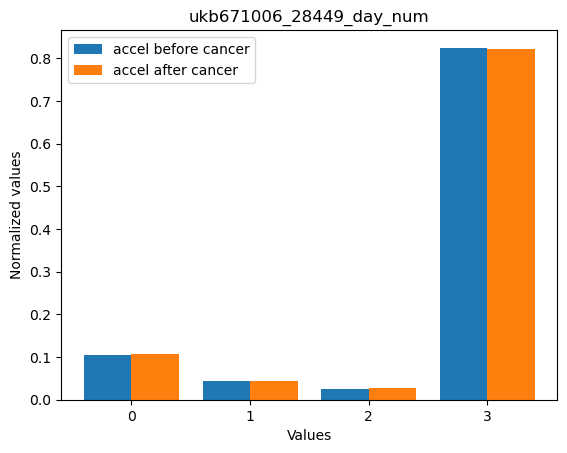


ukb671006_28471_continuous_day
[[ 231  472]
 [ 282  544]
 [ 555 1077]
 [5028 9593]]
p-value: 0.8571433952650748


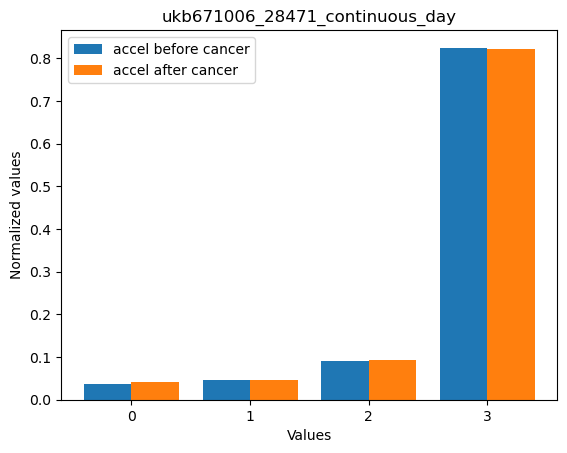


ukb671006_28473_sex
[[2927 7099]
 [3169 4587]]
p-value: 2.836729894372179e-59


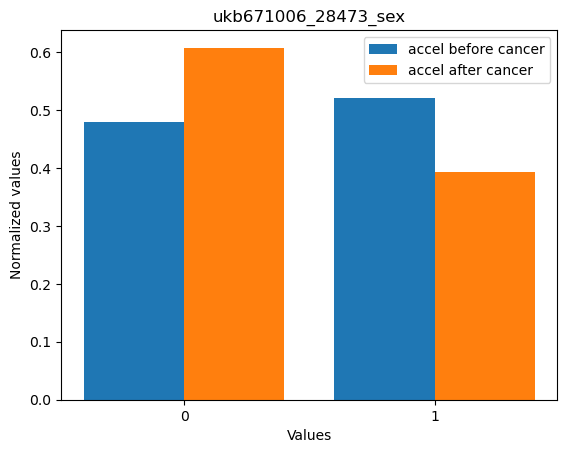


ukb671006_28474_cluster
[[   6   11]
 [   2    5]
 [   1    1]
 [  65  153]
 [ 413  738]
 [   1    3]
 [  24   35]
 [   4    3]
 [4407 8443]
 [   1    2]
 [ 821 1670]
 [ 327  595]
 [   8    6]
 [   7   10]
 [   1    3]
 [   5    4]
 [   3    2]
 [   0    2]]
p-value: 0.45405831164104676


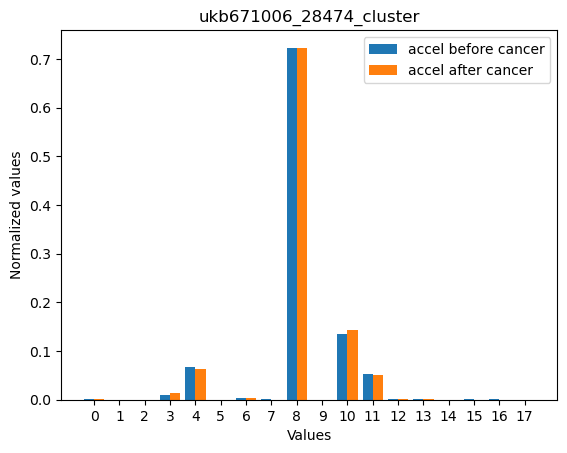


ukb671006_28475_group_eid_old
[[   0    2]
 [  24   35]
 [  23   28]
 [4407 8443]
 [   8    6]
 [  65  153]
 [ 327  595]
 [ 823 1675]
 [ 419  749]]
p-value: 0.08696798717865711


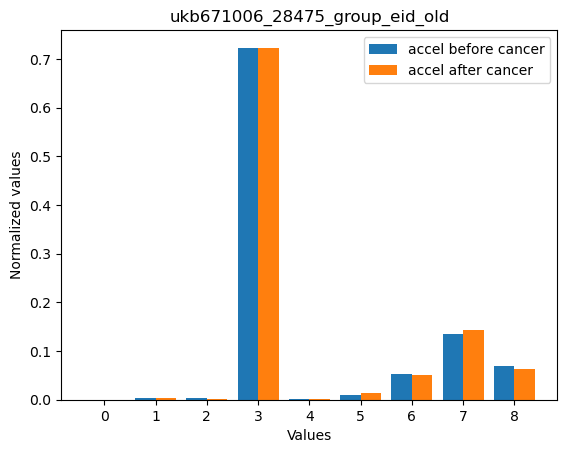


ukb671006_28476_abnormal_group_eid_old
[[  128   205]
 [  244   471]
 [   35    67]
 [  159   300]
 [ 5330 10198]
 [   56   139]
 [   33    56]
 [   46   130]
 [   65   120]]
p-value: 0.21140267535135399


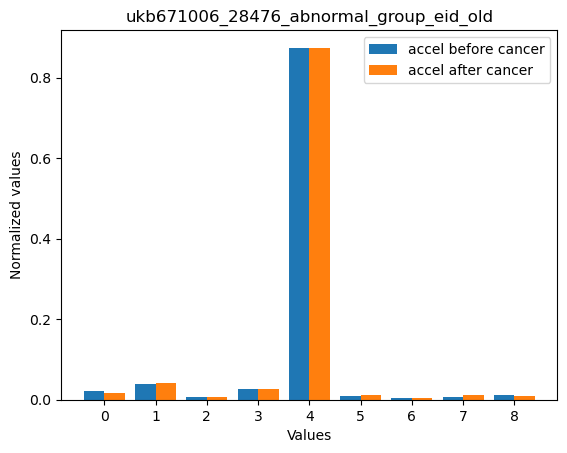


ukb671006_28479_cluster_alphabet
[[   2    5]
 [4407 8443]
 [ 413  738]
 [   6   11]
 [   3    2]
 [  65  153]
 [   1    1]
 [   0    2]
 [   8    6]
 [   1    3]
 [  24   35]
 [   1    2]
 [ 821 1670]
 [   5    4]
 [   4    3]
 [   7   10]
 [ 327  595]
 [   1    3]]
p-value: 0.45405831164104676


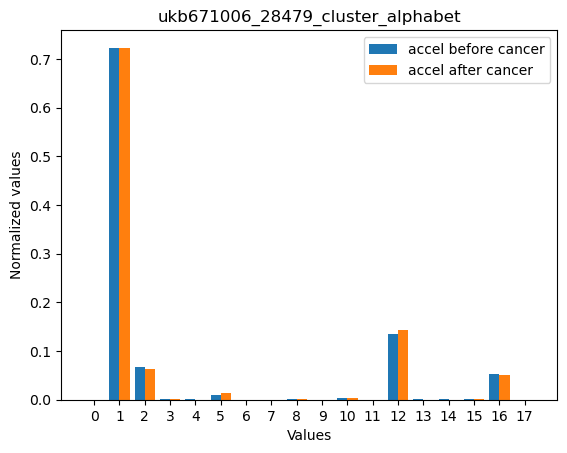


ukb671006_28480_group_five
[[ 888 1828]
 [  32   41]
 [4430 8471]
 [ 419  749]
 [ 327  595]
 [   0    2]]
p-value: 0.11142196651024433


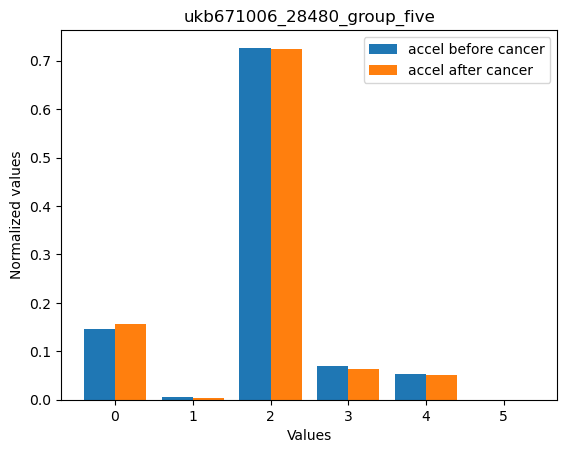


ukb671006_28481_group_eight
[[ 419  749]
 [  24   35]
 [ 823 1675]
 [ 327  595]
 [  65  153]
 [   8    6]
 [   0    2]
 [  23   28]
 [4407 8443]]
p-value: 0.08696798717865711


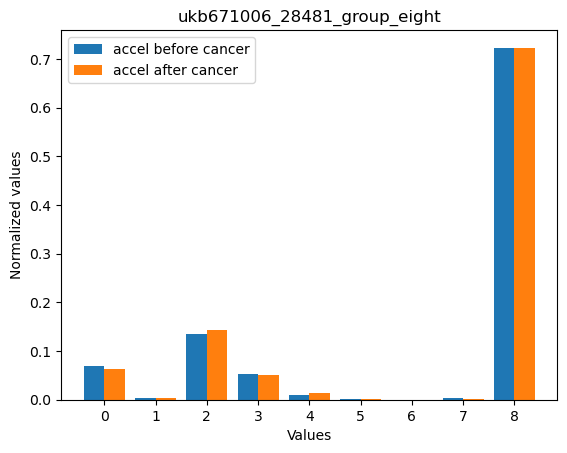


ukb671006_28482_abnormal_group_eight
[[  159   300]
 [   33    56]
 [   65   120]
 [   56   139]
 [   35    67]
 [  128   205]
 [ 5330 10198]
 [  244   471]
 [   46   130]]
p-value: 0.21140267535135399


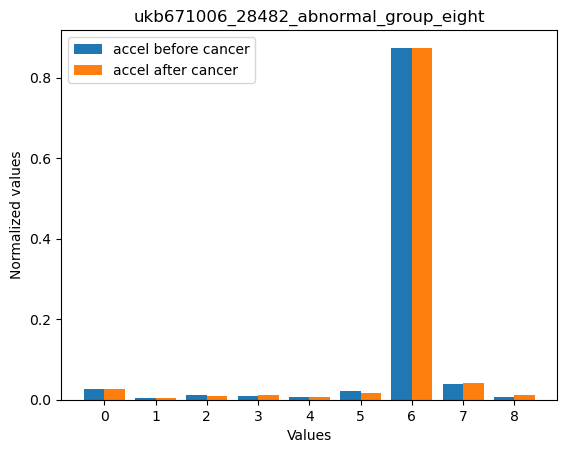


NA_count
[[   0    2]
 [   0    4]
 [   0   14]
 [   0   34]
 [   5  180]
 [  52  672]
 [ 553 2971]
 [5486 7809]]
p-value: 2.6220480847527475e-249


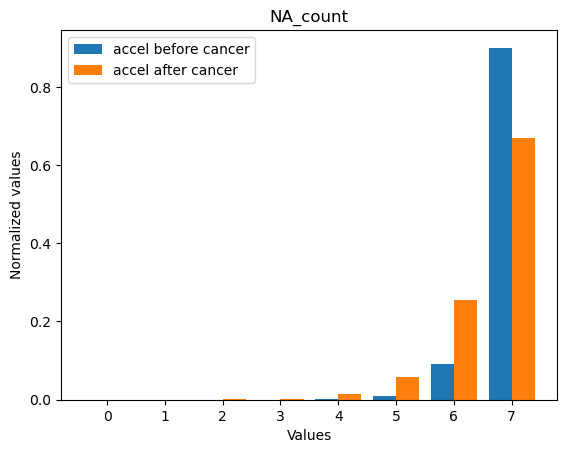

In [22]:
# Process categorical variables

for pheno in pheno_list_categorical:
    print(pheno)
    # List up the frequency of each value in the "ukb671006_28473_sex" column of the two dataframes
    freq_before = df_accel_before_cancer[pheno].value_counts()
    freq_after = df_accel_after_cancer[pheno].value_counts()

    # Print the frequency of each value
    from scipy.stats import chi2_contingency
    import pandas as pd

    # Create a contingency table of the frequencies
    cont_table = (freq_before.join(freq_after, on=pheno, how='outer')
                  .to_numpy()[:, 1:])
    cont_table = np.nan_to_num(cont_table.astype(float), nan=0).astype(int)
    print(cont_table)

    # Perform the chi-squared test of independence
    chi2, p_value, dof, expected = chi2_contingency(cont_table)

    # Print the results of the test
    print("p-value:", p_value)

    # Normalize the data by dividing each row by the row sum
    #normalized_cont_table = cont_table / cont_table.sum(axis=1)[:, np.newaxis]
    normalized_cont_table = cont_table / cont_table.sum(axis=0)

    # Create a bar chart of the normalized data
    fig, ax = plt.subplots()
    plt.title(pheno)
    ax.bar(np.arange(normalized_cont_table.shape[0]) - 0.2, normalized_cont_table[:, 0], width=0.4, label="accel before cancer")
    ax.bar(np.arange(normalized_cont_table.shape[0]) + 0.2, normalized_cont_table[:, 1], width=0.4, label="accel after cancer")
    ax.set_xticks(np.arange(normalized_cont_table.shape[0]))
    #ax.set_xticklabels([f"row {i+1}" for i in range(normalized_cont_table.shape[0])])
    ax.set_xlabel("Values")
    ax.set_ylabel("Normalized values")
    ax.legend()

    plt.show()

    print()
    
    


ukb671006_24430_90010-0.0
p-value: 1.0492500903495824e-21


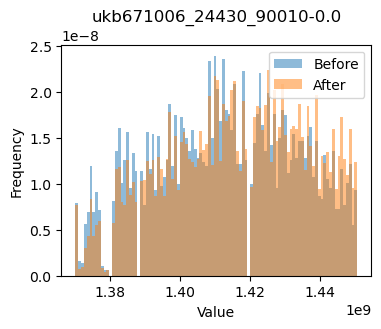

ukb671006_28450_ST_long_mean
p-value: 0.15266683673357678


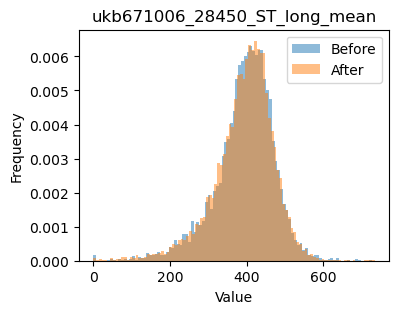

ukb671006_28451_ST_long_sd
p-value: 0.007950624151551037


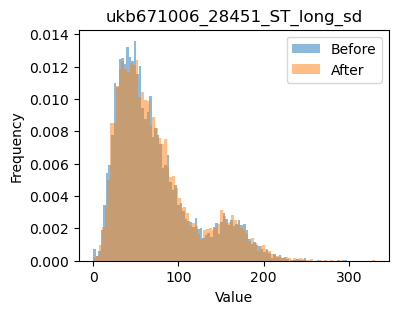

ukb671006_28452_WT_long_mean
p-value: 0.010027992385868677


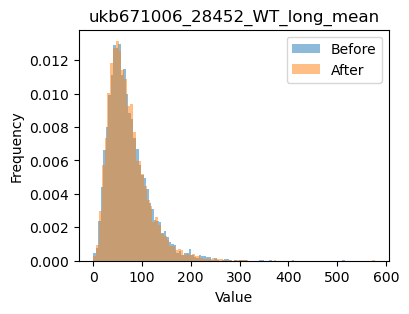

ukb671006_28453_WT_long_sd
p-value: 0.6187737618109026


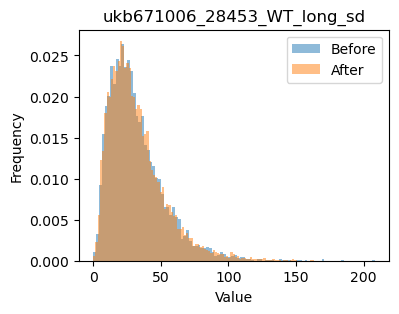

ukb671006_28454_ST_short_mean
p-value: 0.0007691039139975259


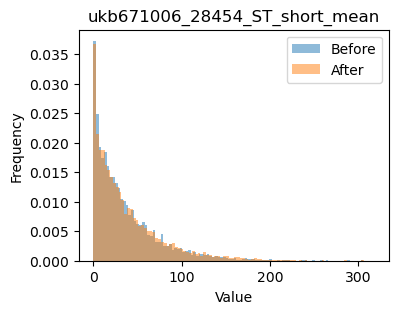

ukb671006_28455_ST_short_sd
p-value: 0.020939096550357764


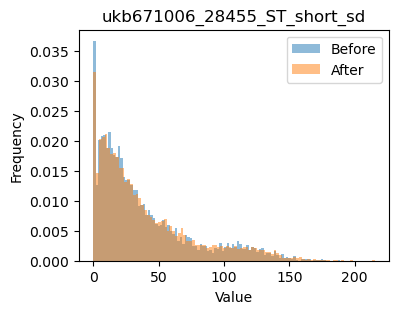

ukb671006_28456_WT_short_mean
p-value: 0.03312927897702161


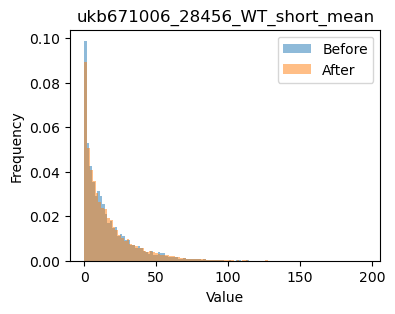

ukb671006_28457_WT_short_sd
p-value: 0.13646281065868932


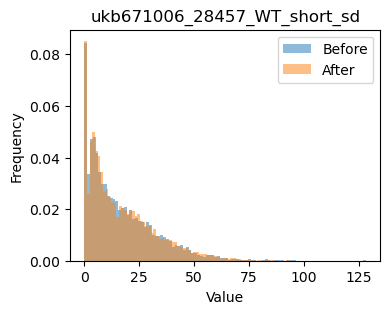

ukb671006_28458_long_window_len_mean
p-value: 0.09235809312763084


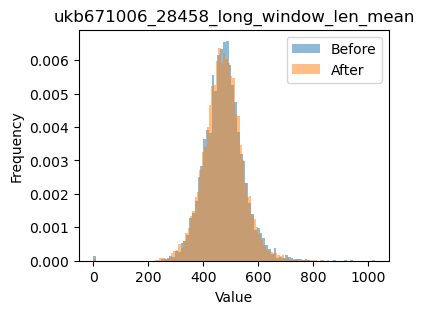

ukb671006_28459_long_window_len_sd
p-value: 0.8056927194722736


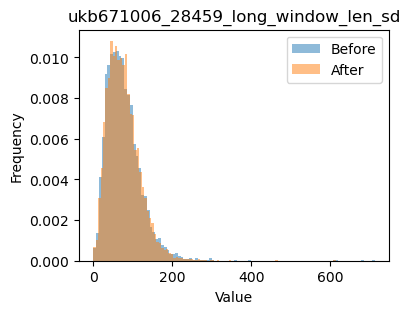

ukb671006_28460_long_window_num_mean
p-value: 0.10847787868587105


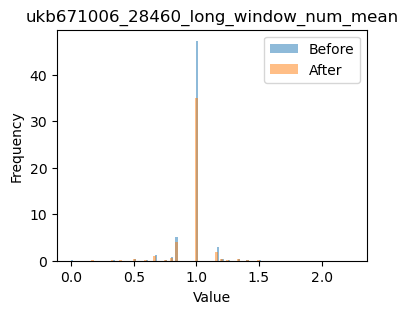

ukb671006_28461_long_window_num_sd
p-value: 0.25555833618003854


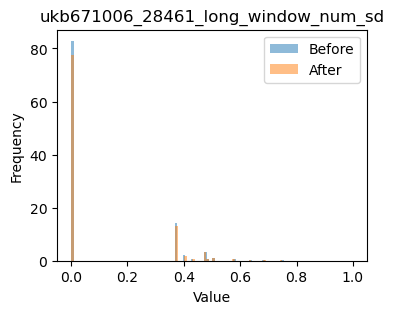

ukb671006_28462_short_window_len_mean
p-value: 0.2116722200998096


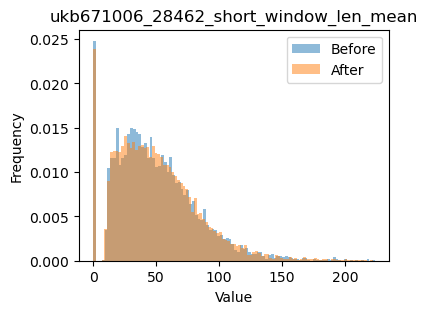

ukb671006_28463_short_window_len_sd
p-value: 0.3045637940692266


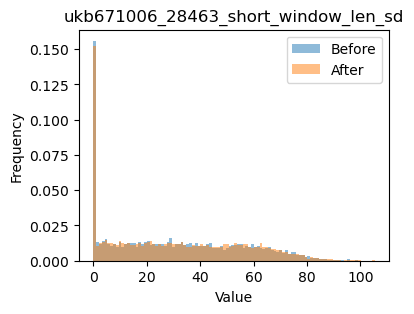

ukb671006_28464_short_window_num_mean
p-value: 0.0014977080389888217


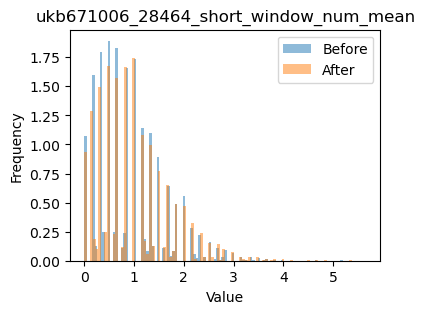

ukb671006_28465_short_window_num_sd
p-value: 0.01300472833069847


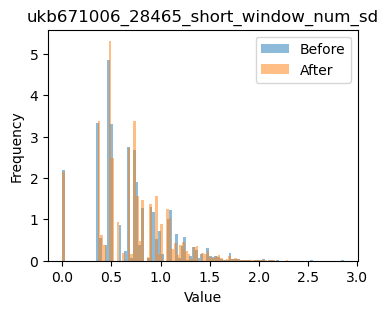

ukb671006_28466_phase_mean
p-value: 0.0019077722698505018


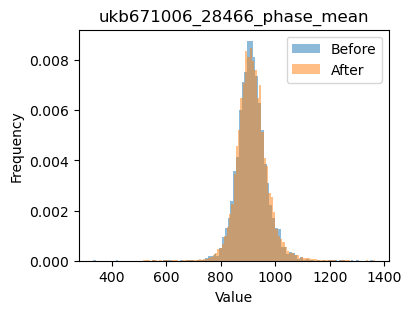

ukb671006_28467_phase_sd
p-value: 0.04204824556813191


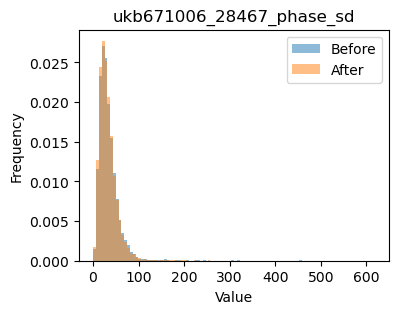

ukb671006_28468_max_period
p-value: 0.21333236835331867


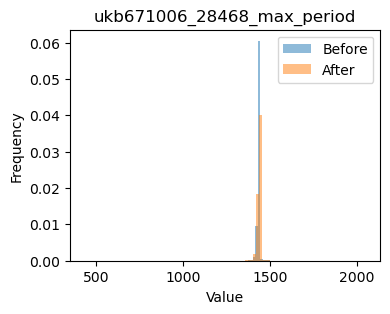

ukb671006_28469_amplitude
p-value: 0.26822633570592547


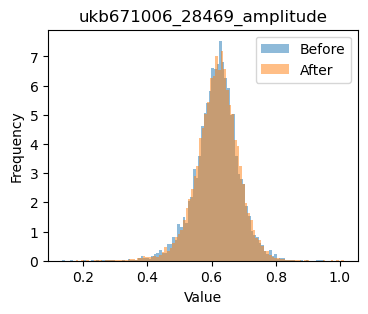

ukb671006_28470_sleep_percentage
p-value: 0.8000934441862638


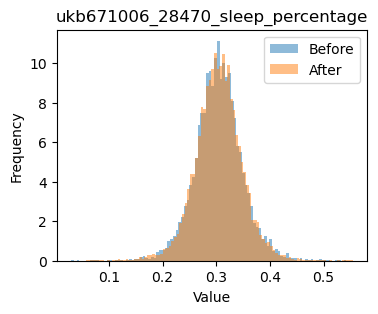

ukb671006_28472_age
p-value: 0.2558079688370965


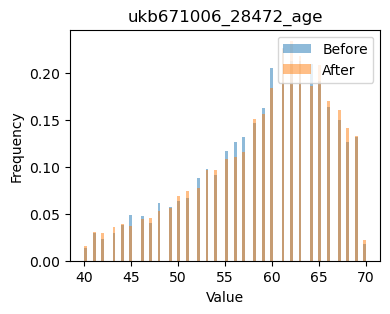

NA_count
p-value: 0.0


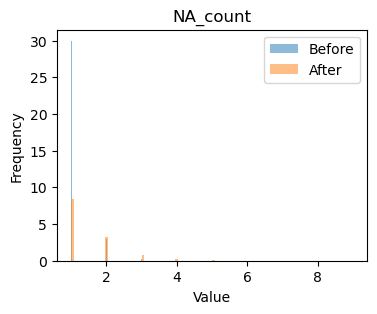

In [14]:
# Process continuous variables

# Convert anything to np.float32
def pl_to_float(df):
    result = df.to_numpy()
    try:
        result = result.astype(float)
    except:
        if "T" in result[0]: # Date-time format
            # Convert the date strings to datetime objects
            result = np.array([datetime.fromisoformat(date_str) for date_str in result])

            # Extract the date component and convert to integer
            result = np.array([int(date_obj.timestamp()) for date_obj in result])
    return result


for pheno in pheno_list_continuous:
    print(pheno)

    # Calculate mean, median, and standard deviation for the two dataframes
    np_before = pl_to_float(df_accel_before_cancer[pheno])
    np_after = pl_to_float(df_accel_after_cancer[pheno])

    mean_before = np_before.mean()
    median_before = np.median(np_before)
    std_before = np_before.std()

    mean_after = np_after.mean()
    median_after = np.median(np_after)
    std_after = np_after.std()

    # Perform a two-sample t-test to test for significant differences between the two distributions
    t_stat, p_value = ttest_ind(np_before, np_after, equal_var=False)

#    print("Accelerometry before cancer")
#    print("Mean: {}, Median: {}, SD: {}".format(mean_before, median_before, std_before))
#    print("Accelerometry after cancer")
#    print("Mean: {}, Median: {}, SD: {}".format(mean_after, median_after, std_after))
    print("p-value:", p_value)

    # Plot the distribution of the pheno column for each dataframe
    plt.figure(figsize=[4, 3])
    plt.hist(np_before, alpha=0.5, label="Before", density=True, bins=100)
    plt.hist(np_after, alpha=0.5, label="After", density=True, bins=100)
    plt.legend(loc="upper right")
    plt.title(pheno)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

